<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Homework/Homework04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework #04

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

## Problem 4.1 (4 points)

_Plotting wavefunctions. Using special functions._

The Schrodinger equation for the harmonic oscillator, with potential $V=\frac{1}{2} \omega^2 m x^2$, is:

$$ \frac{\mathrm{d}^2 \psi}{\mathrm{d}\xi^2} = (\xi^2 - K)\psi $$

where $\xi \equiv \sqrt{\frac{m \omega}{\hbar}}x$  the x coordinate in units of $\sqrt{\frac{\hbar}{m \omega}}$ and $K\equiv \frac{2E}{\hbar\omega}$ is the energy in units of $\hbar \omega/2$. The equation has solutions for discrete (i.e., quantized) energies 

$$E_n = (n +\frac{1}{2}) \hbar \omega  \qquad n=0,1,2,\ldots$$.

The corresponding wavefunctions (disregarding normalization) are:

$$\psi_n(\xi)=\frac{1}{\sqrt[4]{\pi}}\frac{1}{\sqrt{2^n n!}} H_n(\xi) e^{-\xi^2/2}$$

Here $H_n$ are the _Hermite polynomials_.


1. Plot $\psi_n(\xi)$ for $n \in 0..3$ and $-4<\xi<4$. You'll need to `import scipy.special as sf` and then use `sf.eval_hermite` or `sf.hermite`. You'll also want to use `sf.factorial` and `exp`, `power` and `pi` from `scipy`.  Label both axes and give a legend to your plot indicating which value of `n` corresponds to which curve.
2. Physically, the square of the wavefunction is the important thing. It's proportional to the probability of finding the particle at each position $\xi$. Plot $|\psi_n(\xi)|^{2}$ for $n \in 0..3$ and $-4<\xi<4$. Also label and provide a legend.

Note: In classical physics the potential $V(x)\leq E$, which in this problem corresponds to $$\frac{m\omega^2}{2} x^2 \leq (n+1/2)\hbar \omega$$  or

$$ |\xi| \leq \sqrt{2(n+1/2)} $$

In quantum mechanics there is a non-zero probability of finding the particle in the classically forbidden region.

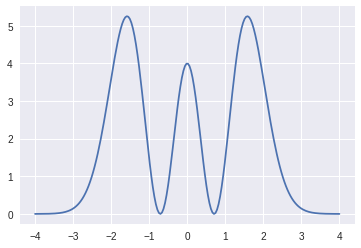

In [0]:
x = np.linspace(-4.0, 4.0, 200)
plt.plot(x, (sp.special.eval_hermite(2,x) * sp.exp(-x**2/2))**2)

## Problem 4.2 (3 points)

_Using informal arguments_

Write a function `polynomial` which implements a polynomial function of arbitrary integer order $n$:

$$ f(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_n x^n $$

The function should take $x$ as a formal argument and the constants $\{c_i\}$ as informal arguments. You will have to use the `*args` function argument (see Lecture 5). The `enumerate` builtin function will also be convenient in order to get the power $i$ to go along with each $c_i$. Recall, you can index tuples just like arrays by using [].

Test your function by plotting:

$$ f(x) = 1 + 2 x^2 $$

over the range (-3,3).

## Problem 4.3 (4 points)

The Legendre polynomials $P_i(x)$ occur quite often in physics, for example in the solution to Schroedinger's equation in spherical coordinates. They are defined by the first two terms:

$$ P_0(x) = 1 \qquad \mbox{and} \qquad P_1(x) = x $$

and the recursion relation

$$ P_{n+1}(x) = \frac{2n+1}{n+1} x P_{n}(x) - \frac{n}{n+1} P_{n-1}(x) $$

Define a recursive function `legendre(n,x)` to represent the Legendre polynomial for arbitrary integer order $n$.  Plot the result for $n\in 0\ldots 5$ and $-1<x<+1$.

Now, there is a technical difficulty here.  For $P_0$ we want to return 1. But, recall that the function will be used in the `plt.plot` command to make an array. So, if `x` has length `N` then $P_0(x)$ must also have length `N`.  This can be done by returning `np.array([1]*len(x))` or `np.ones(len(x))`.


## Problem 4.4 (3 points)

The Hermite polynomials are solutions to Hermite's differential equation:

$$ H''_n(x) -2x H'_n(x) = - 2n H_n(x) $$

Verify this by plotting the difference of the left-hand and right hand sides as a function of x for $n\in 2\ldots 5$. In addition to the first derivative introduced in class you will need to code up a function `DD(f,x)` to take the second derivative:

$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} $$

Now, there is a technical difficulty.  I would like to do this:

```
#define D and DD
import scipy.special as sf
x = np.linspace(-1,1,100)
plt.plot(x,DD(sf.eval_hermite(3,x),x) - 2*x*D(sf.eval_hermite(3,x),x) + 2*3*sf.eval_hermite(3,x))
```

But, Python will complain bitterly about being asked to take the derivative of a `np.ndarray`.  The issue is that we specify the order of the hermite polynomial when the function is called. And, if the function is called, it returns an array. But, the derivative functions take the function itself as an argument and don't know that the function is to be called as `f(n,x)` rather than `f(x)`. So what to do? There is a techical workaround: use a lambda to make a new function `hn(x)` in which the value of n is fixed. For example:

```
h3 = lambda x: sf.eval_hermite(3,x)
```

That will work as expected (try plotting just `h3(x)`). You'll notice some jitter around 0. Try playing with the size of h.

### Bonus point (1 point)

There is another workaround that is, arguably, even more elegant: rewrite your derivative function to return a function (using lambda) instead of a list of values. Then you will be able to use `sf.hermite(3)` directly. You will end up with some interesting looking syntax, like `D(D(sf.hermite(3)))(x)`.

## Problem 4.5 (2 points)

Suppose I add $x_1=1.2340\times 10^6$ and $x_2= 0.6100010$ as 32-bit floating point numbers in order to get a new quantity $y$.

a. How many bits of precision are lost from $x_2$?

b. What is the estimated roundoff error on $y$?

_Note: 32-bit numbers encode the mantissa 1.F with 24 bits; 23 are used for F._

You should feel free to use the IEEE 754 calculator http://www.h-schmidt.net/FloatConverter/IEEE754.html


## Problem 4.6 (4 points)

Describe how this sorting algorithm works in a paragraph. Feel free to insert any print statements.

In [0]:
def mysort(L, start = 0, end = None):
    if end == None:
        end = len(L)
    if start < end-1:
        x = mysplit(L, start, end)
        print("in mysort: ", L)
        mysort(L, start, x)
        mysort(L, x+1, end)

def mysplit(L, start, end):
    val_first = L[start]
    h = start
    print("before manipulation in mysplit: ", L)
    for i in range(start+1, end):
        if L[i] < val_first:
            h += 1
            L[i], L[h] = L[h], L[i]
            print("during manipulation in mysplit: ", L)
    L[h], L[start] = L[start], L[h]
    print("after manipulation in mysplit: ", L)
    return h

A = [28, 82, 23, 44, 59,  4, 60, 25, 81, 74, 61, 32, 74,  4, 62, 86, 48, 28, 89, 22]

mysort(A)
print(A)

before manipulation in mysplit:  [28, 82, 23, 44, 59, 4, 60, 25, 81, 74, 61, 32, 74, 4, 62, 86, 48, 28, 89, 22]
during manipulation in mysplit:  [28, 23, 82, 44, 59, 4, 60, 25, 81, 74, 61, 32, 74, 4, 62, 86, 48, 28, 89, 22]
during manipulation in mysplit:  [28, 23, 4, 44, 59, 82, 60, 25, 81, 74, 61, 32, 74, 4, 62, 86, 48, 28, 89, 22]
during manipulation in mysplit:  [28, 23, 4, 25, 59, 82, 60, 44, 81, 74, 61, 32, 74, 4, 62, 86, 48, 28, 89, 22]
during manipulation in mysplit:  [28, 23, 4, 25, 4, 82, 60, 44, 81, 74, 61, 32, 74, 59, 62, 86, 48, 28, 89, 22]
during manipulation in mysplit:  [28, 23, 4, 25, 4, 22, 60, 44, 81, 74, 61, 32, 74, 59, 62, 86, 48, 28, 89, 82]
after manipulation in mysplit:  [22, 23, 4, 25, 4, 28, 60, 44, 81, 74, 61, 32, 74, 59, 62, 86, 48, 28, 89, 82]
in mysort:  [22, 23, 4, 25, 4, 28, 60, 44, 81, 74, 61, 32, 74, 59, 62, 86, 48, 28, 89, 82]
before manipulation in mysplit:  [22, 23, 4, 25, 4, 28, 60, 44, 81, 74, 61, 32, 74, 59, 62, 86, 48, 28, 89, 82]
during manipul